## Baseball Case Study
    
   Problem Statement:
   This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number    of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different            features that will be used as the inputs to the machine learning and the output will be a value that represents the number      of  wins. 

## Importing requried Libraries

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

## Importing the dataset

In [7]:
os.chdir("C:\github_repo\Files")
df= pd.read_csv('baseball.csv')   # Reading the data file
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Importing the dataset

In [8]:
df.head()  # checking the first five raws from the data set

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [10]:
df.shape

(30, 17)

There are 30 rows and 17 columns in my dataset.

In [11]:
#Checking the data types of all columns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

ERA is a float type data and except ERA all columns are int type data.

In [12]:
#Checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


So,I can there is a(1)float64 vallue and (16)int value and there are no null values.

In [13]:
#Checking null values in dataset
df.isnull().sum()


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No missing values are present in the given dataset.

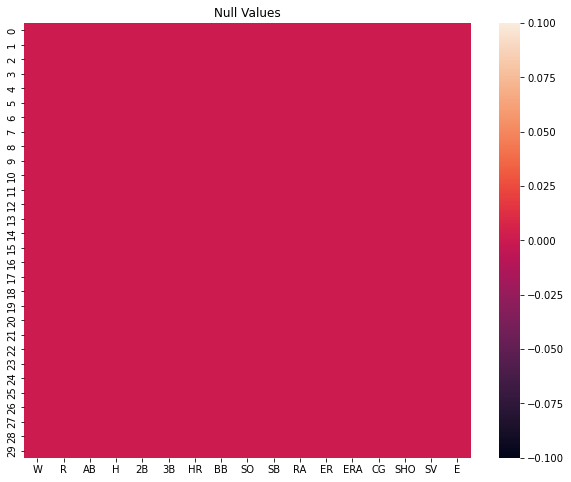

In [15]:
#Checking for null values in heat map
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

I can see in graph that there is no null values in the given dataset.

In [16]:
#Checking value counts of target column
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

I can see there are no missing values or spaaces in the target column.

In [17]:
#Checking description of dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


I can observe that all the columns have the count value of 30 there are no negative values and Few columns have very low values in it, where few have very low values in it, where few have very high values in the datset.

## Data Visualization

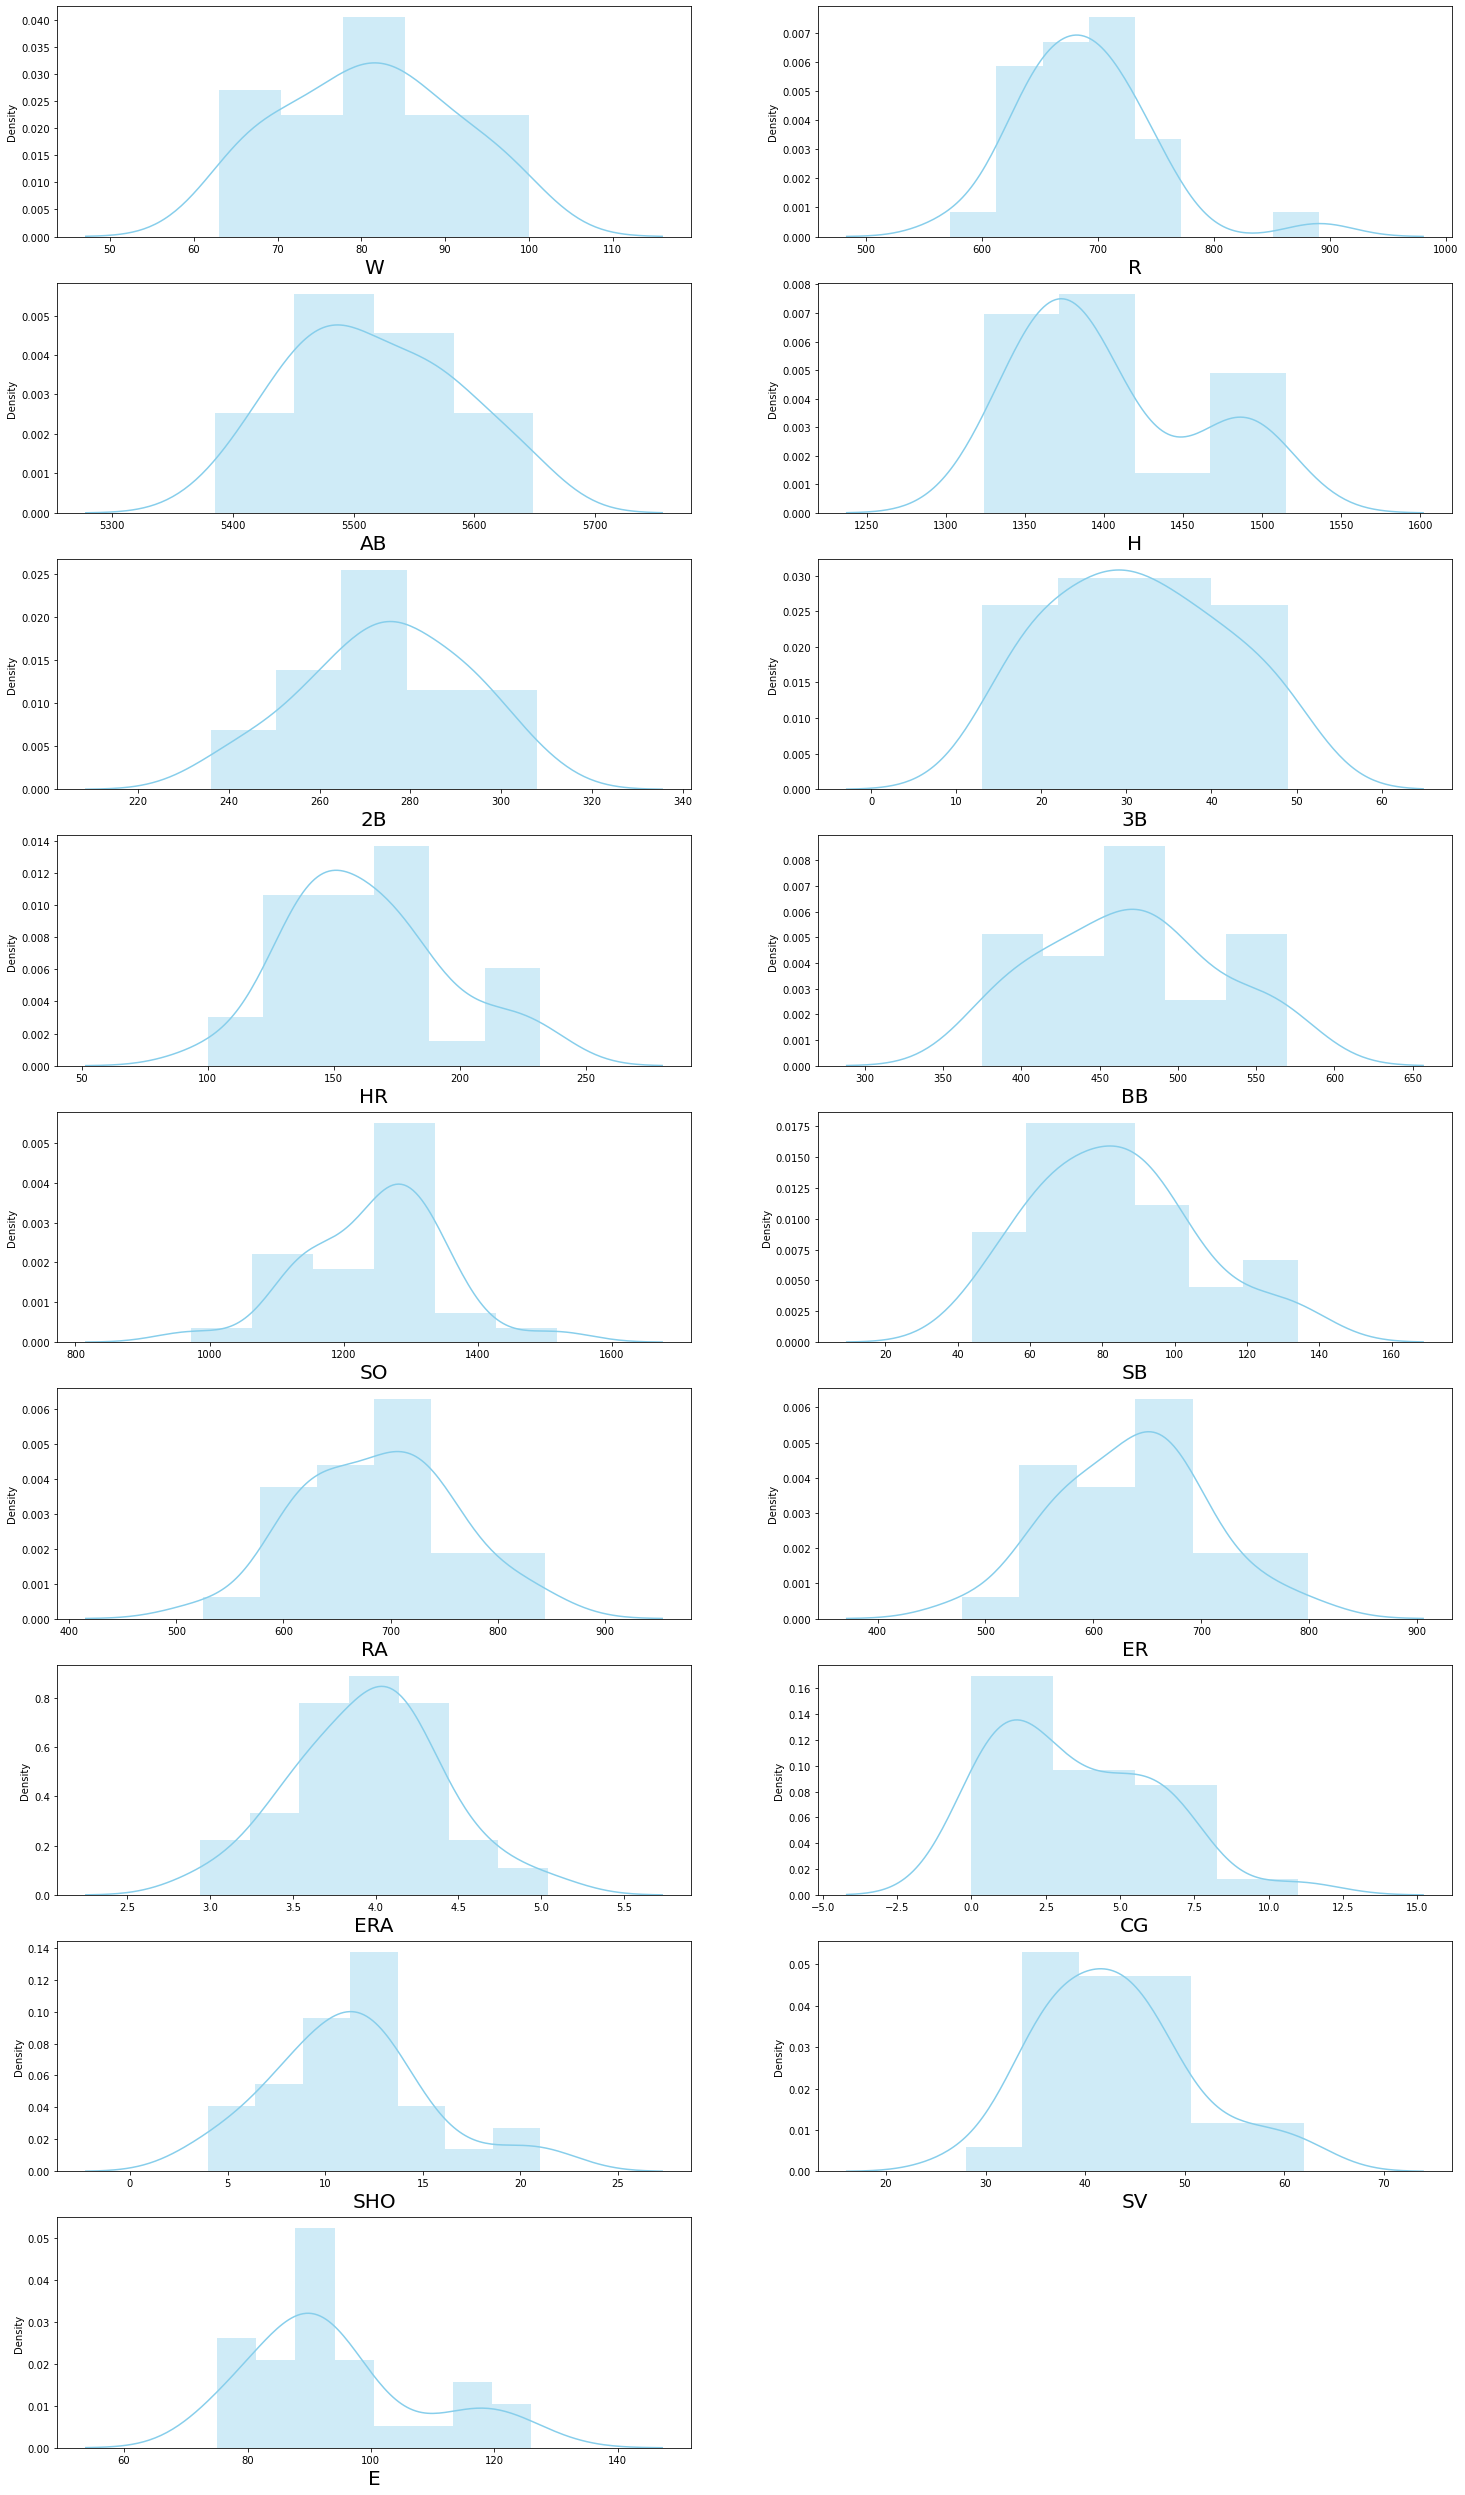

In [18]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

Almost all the columns are normally distributed.Except R,SO,CG and E.

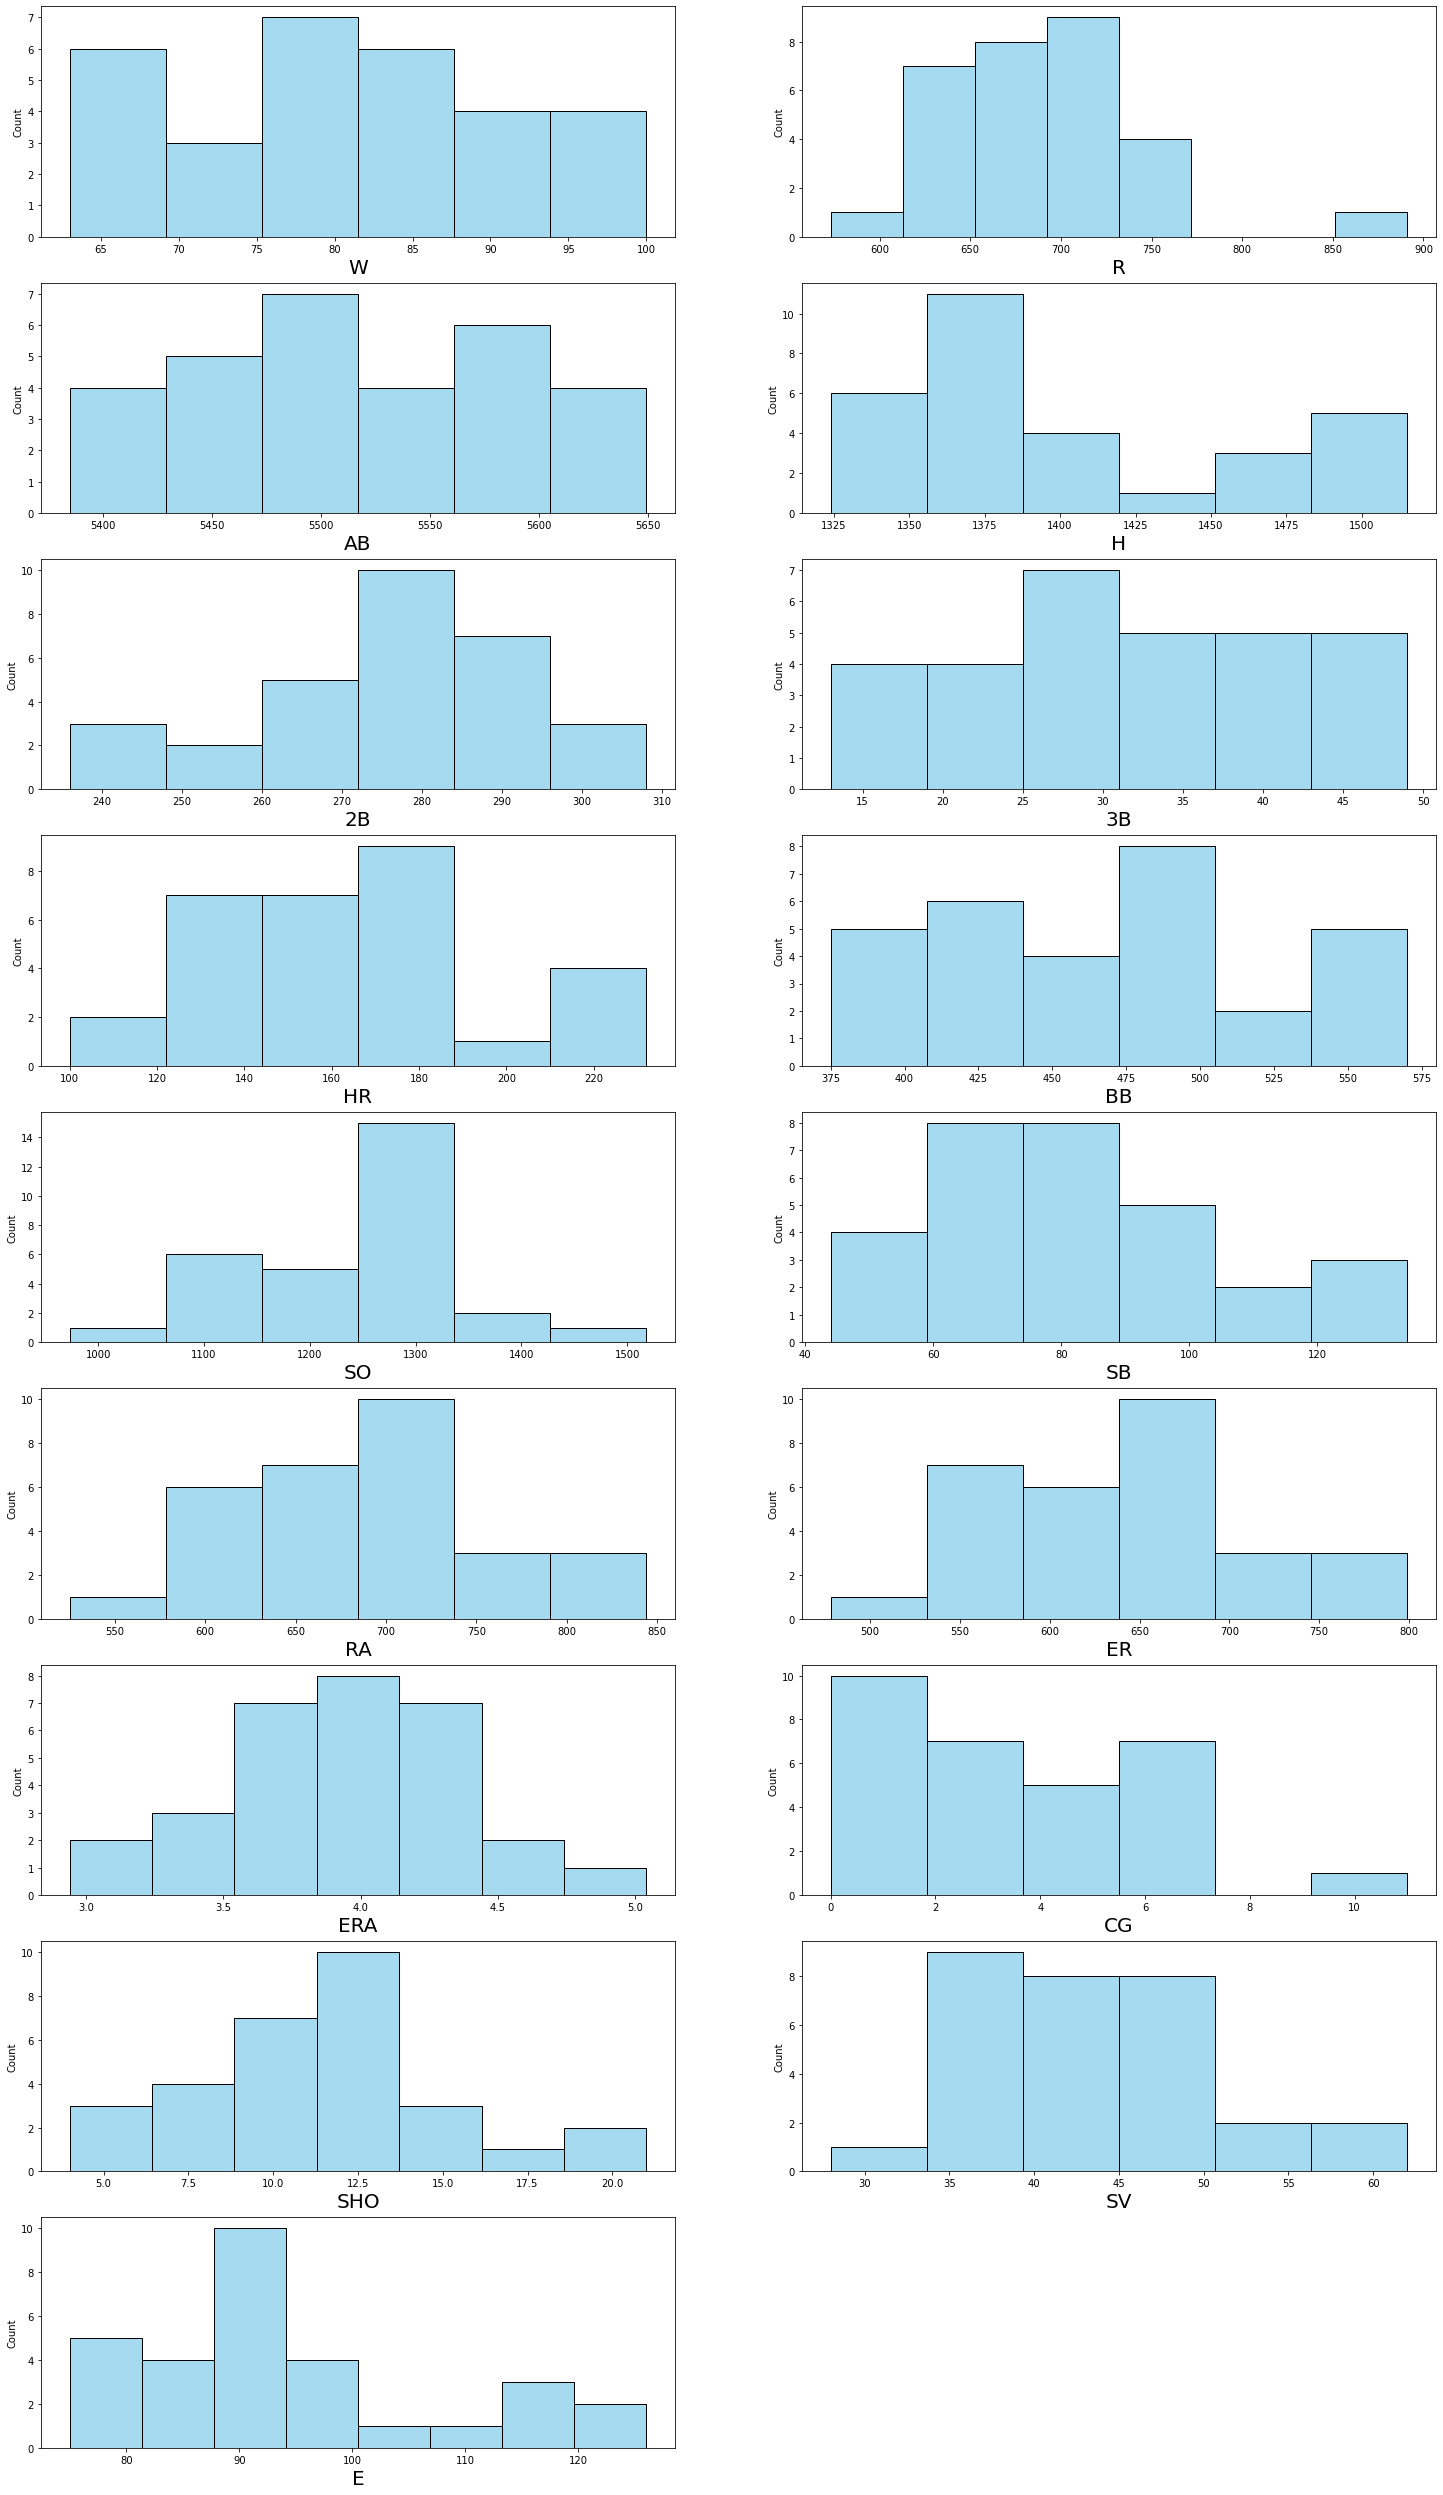

In [19]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

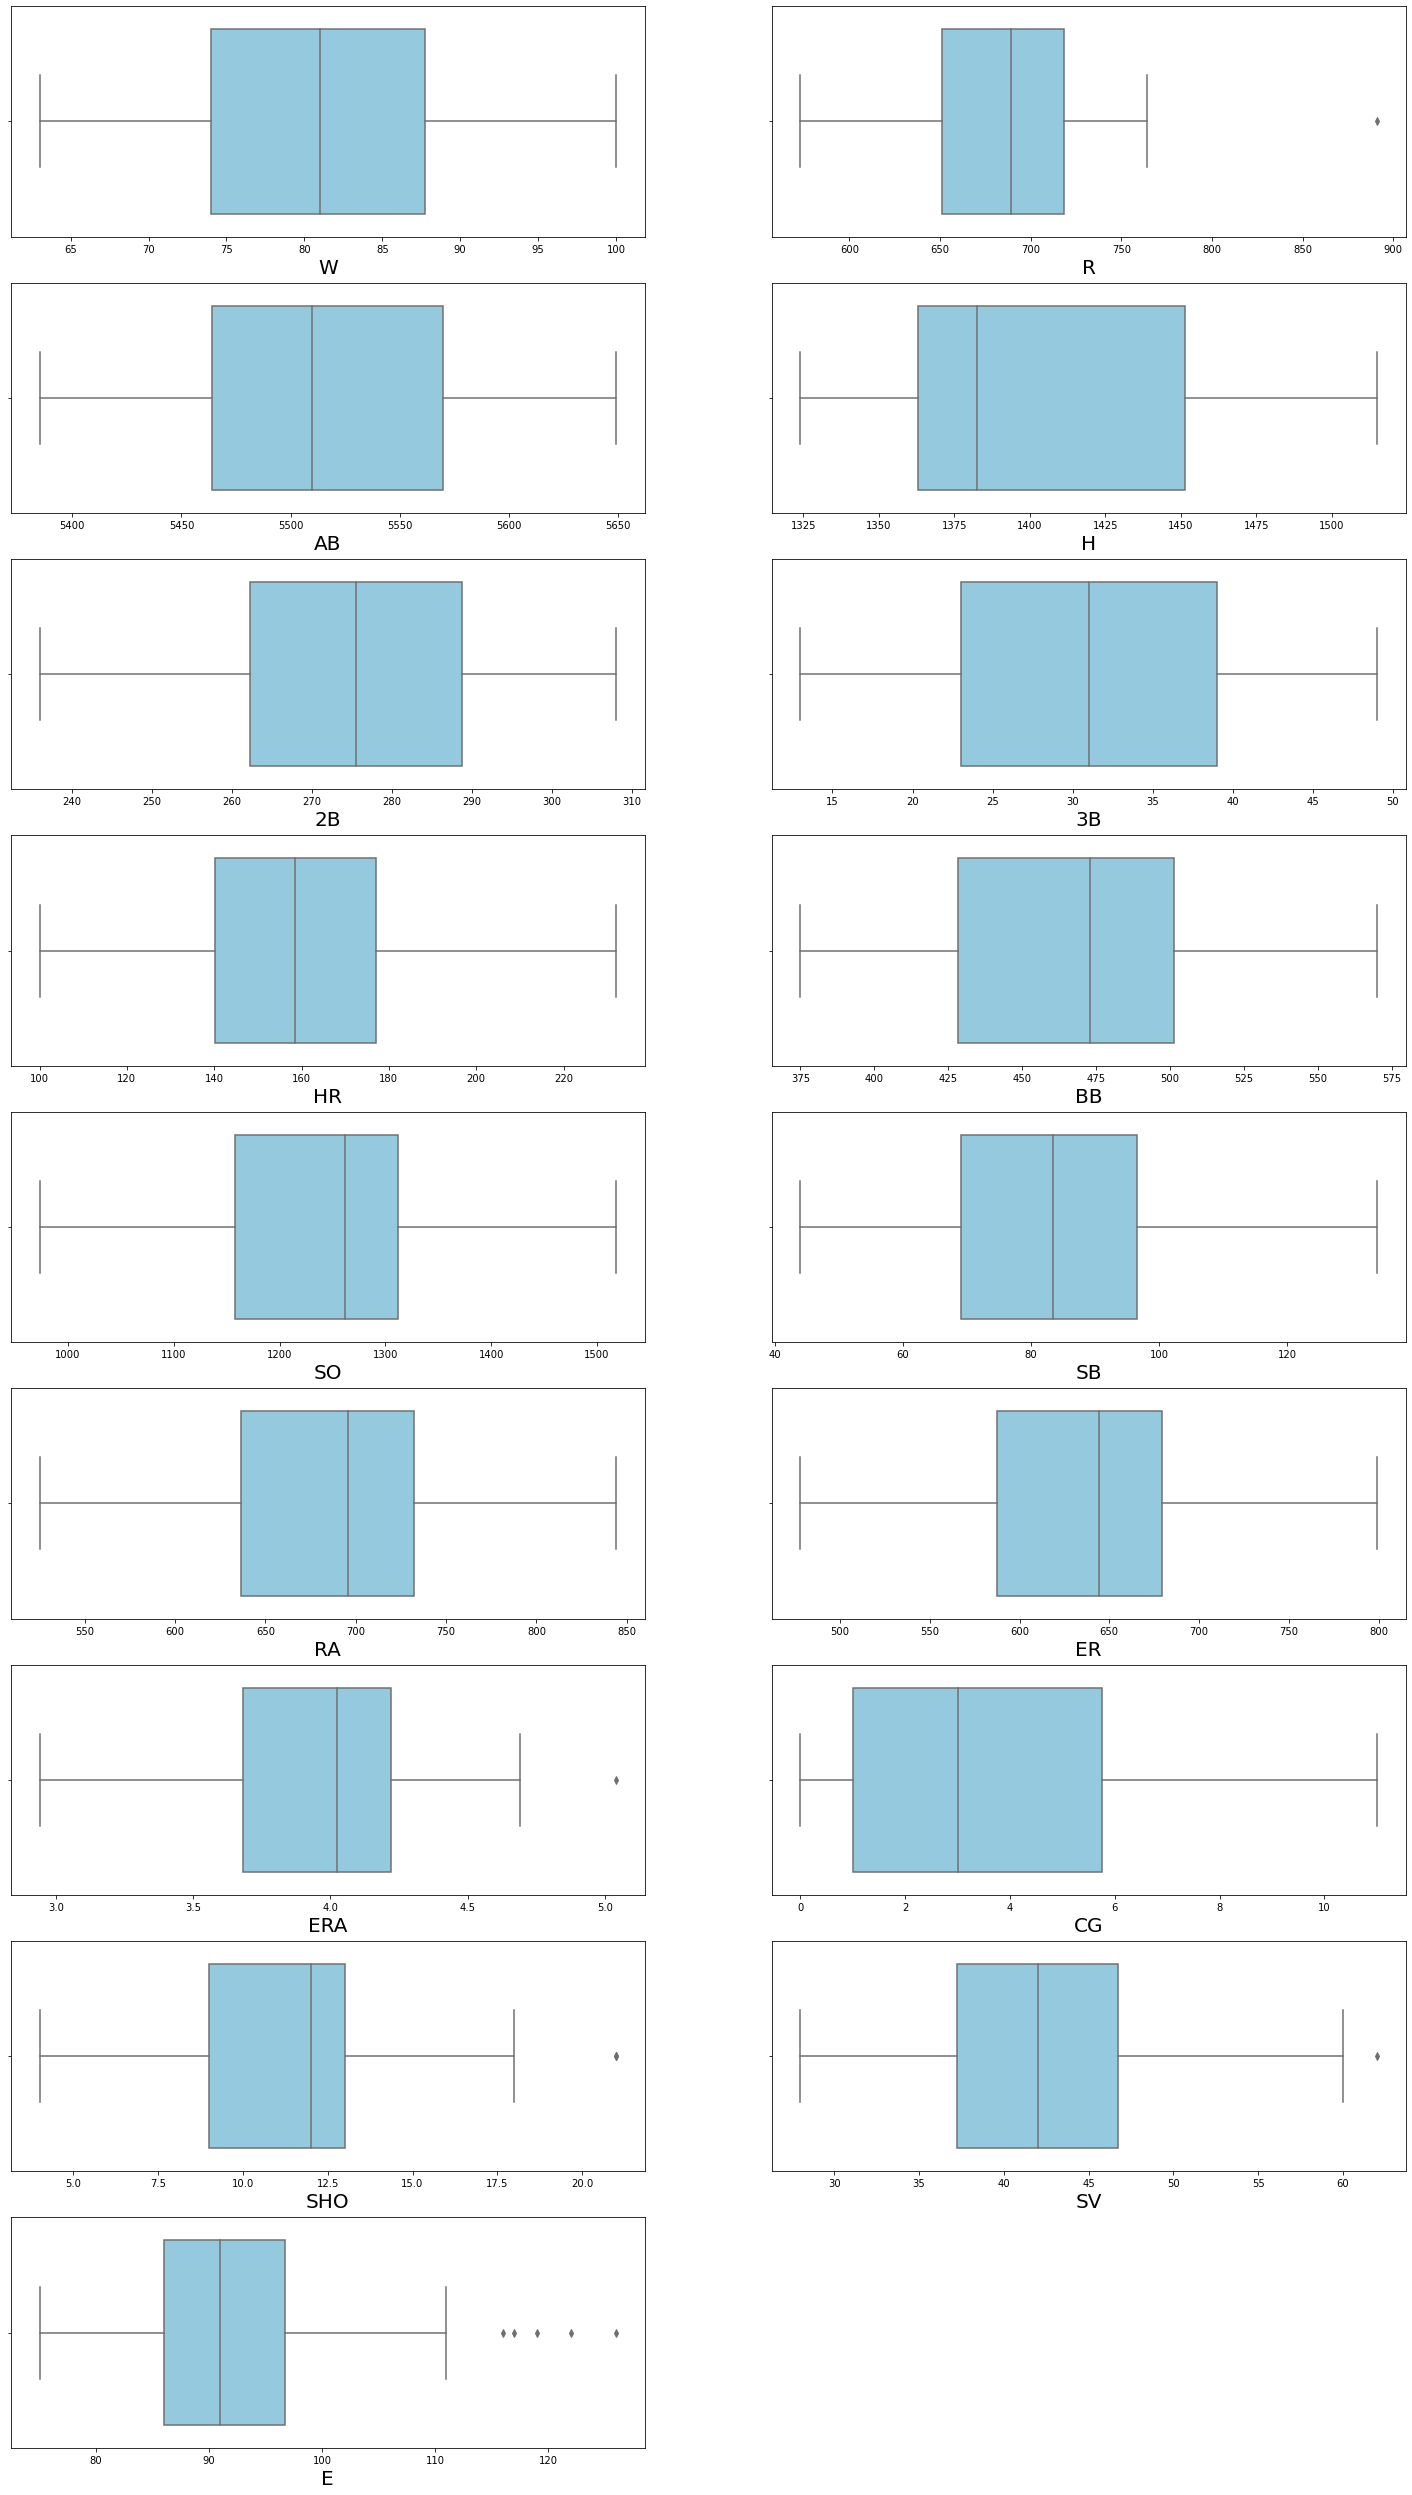

In [20]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

As shown in boxplot R,ERA,SHO,SV and E input variable is having outliers in it. So,we need remove outliers from that the input variables.

## Bivariate Analysis

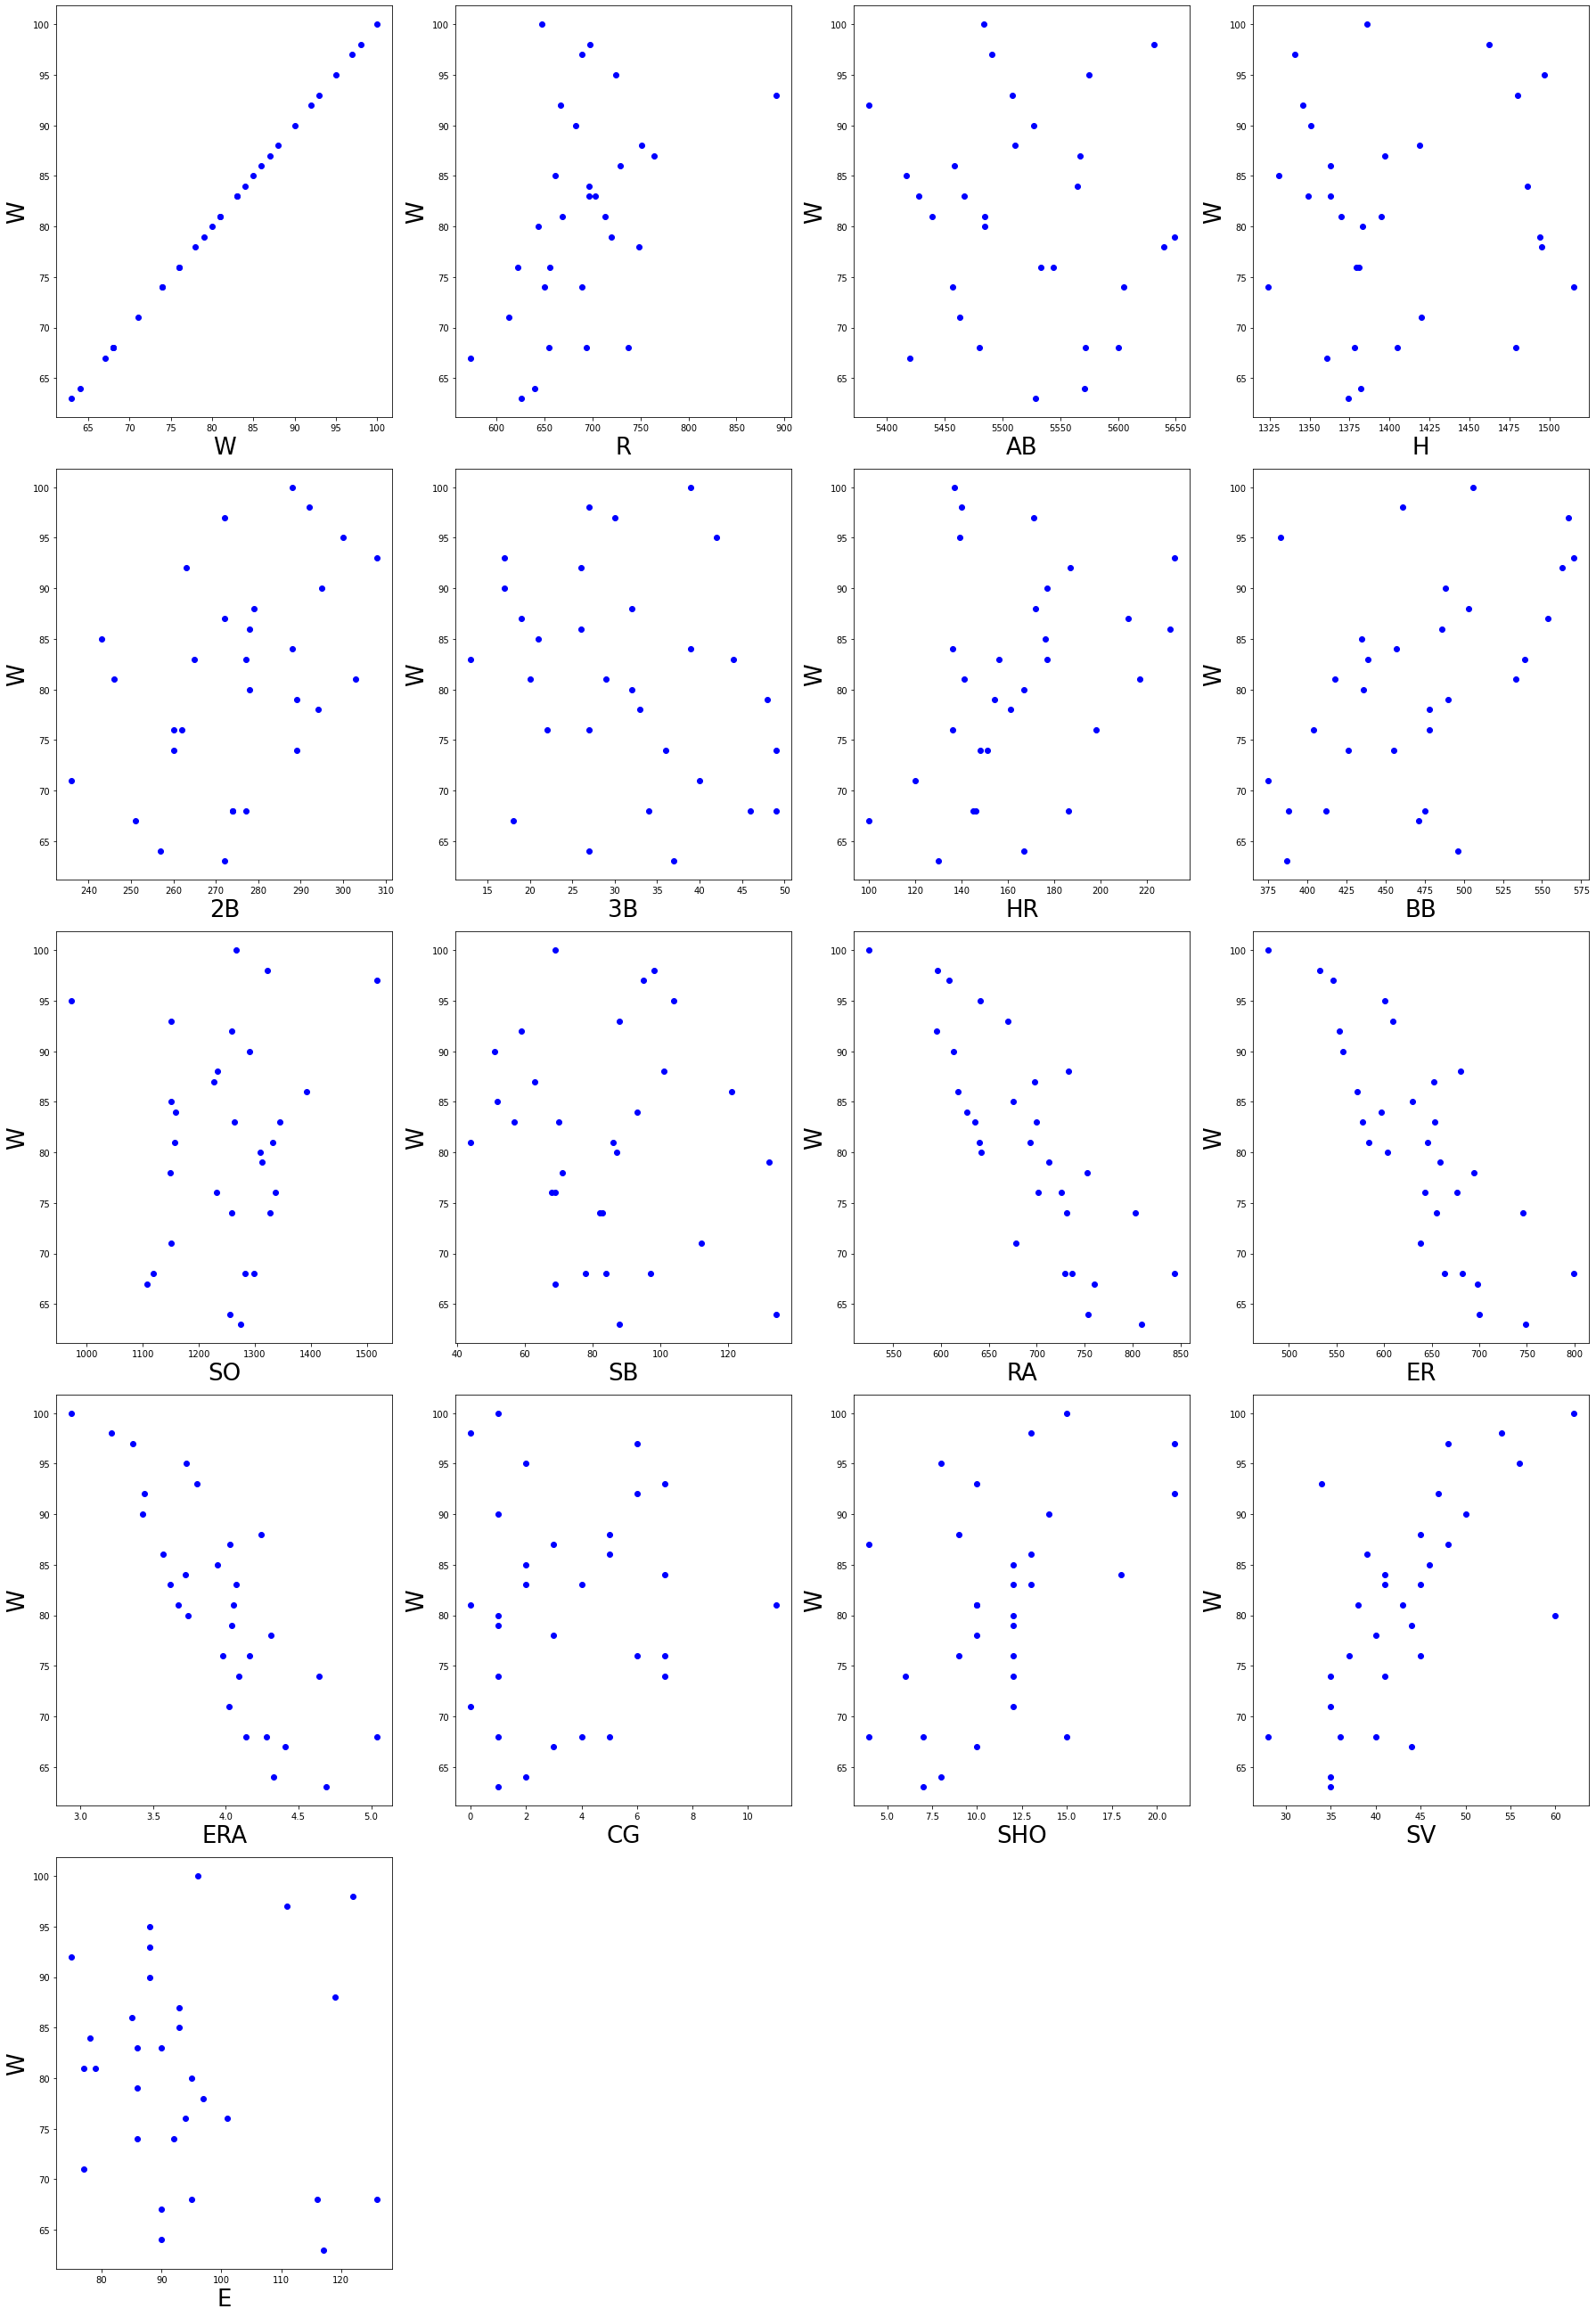

In [21]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['W'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()

As, we can see in plot SV,ERA,SHO and R is having almost linear relationship with target variable and other variables are having non linear relation ship with target variable.

<Figure size 1800x1440 with 0 Axes>

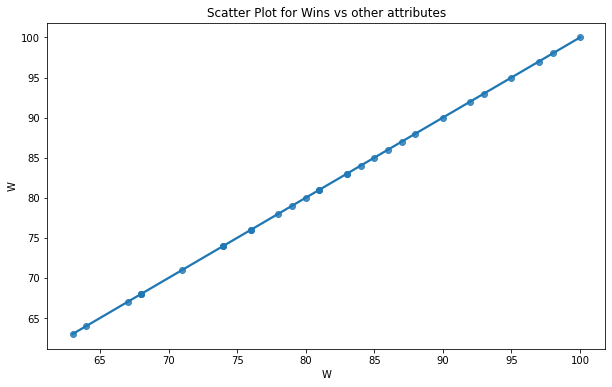

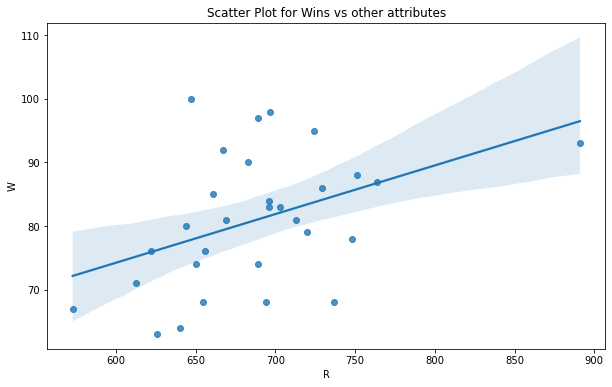

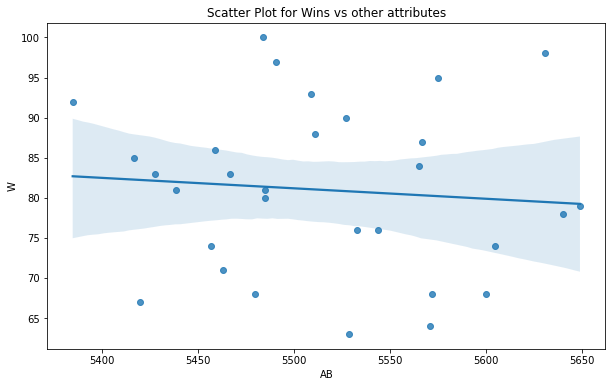

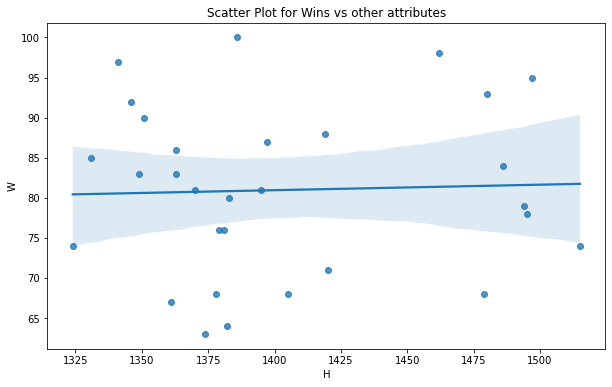

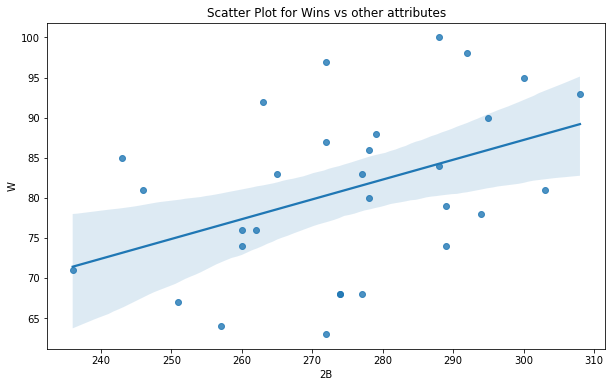

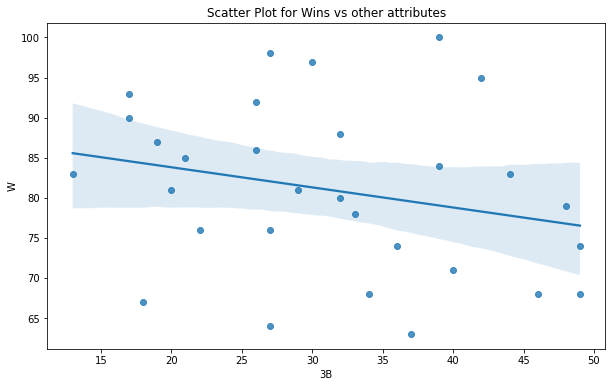

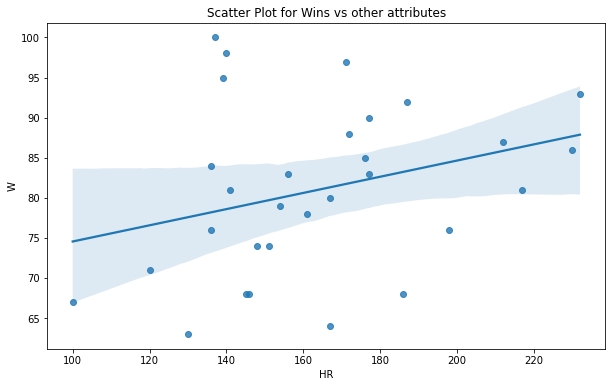

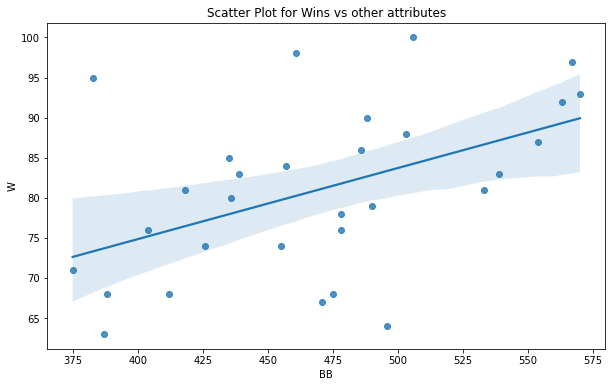

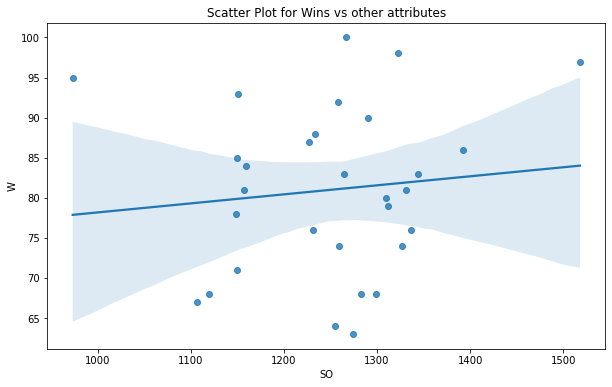

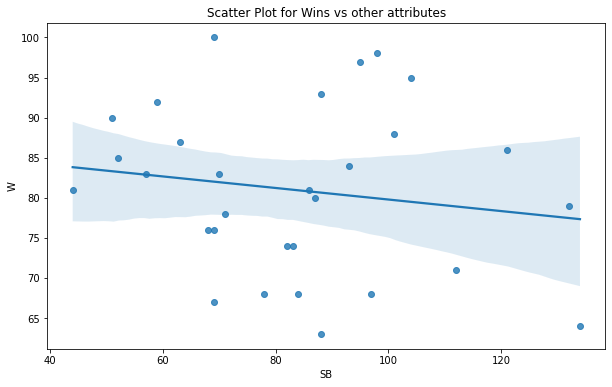

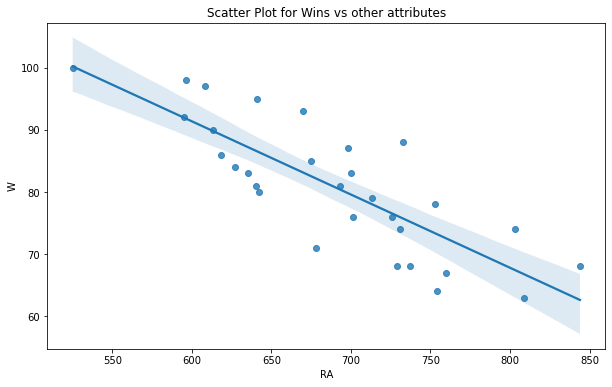

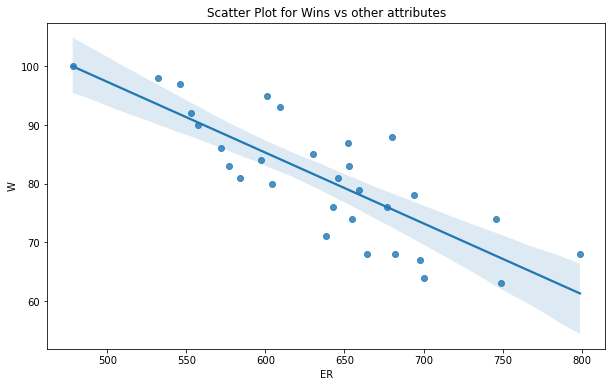

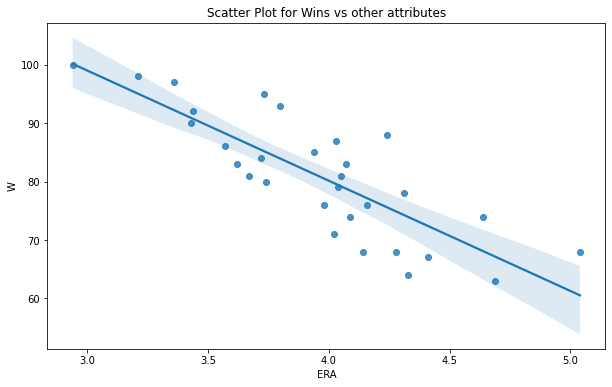

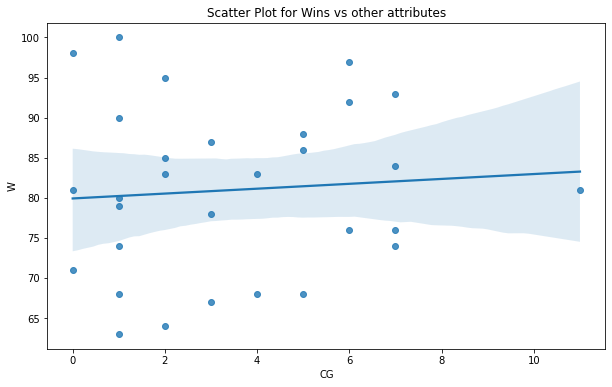

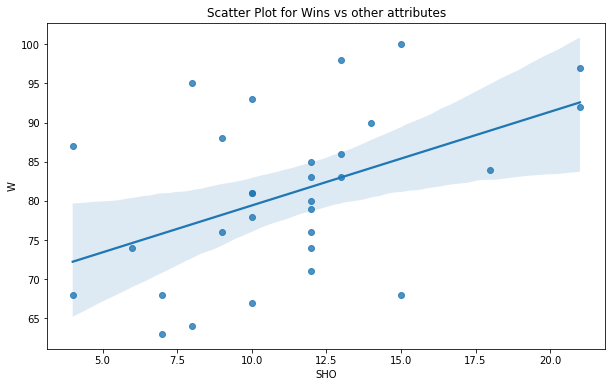

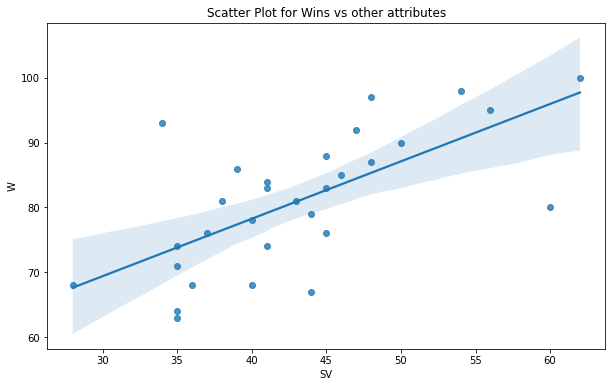

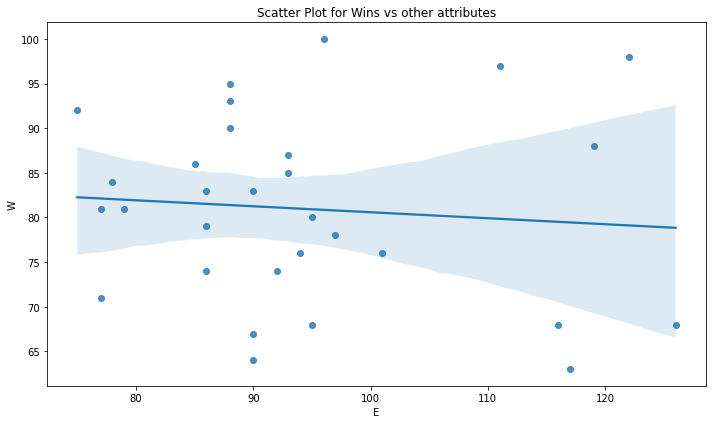

In [22]:
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['W'])
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

RA,ER,ERA have good relation with Win. Reset all the Columns does not good Relation with Win because data is scatter across all the places.

## Multivariate Analysis

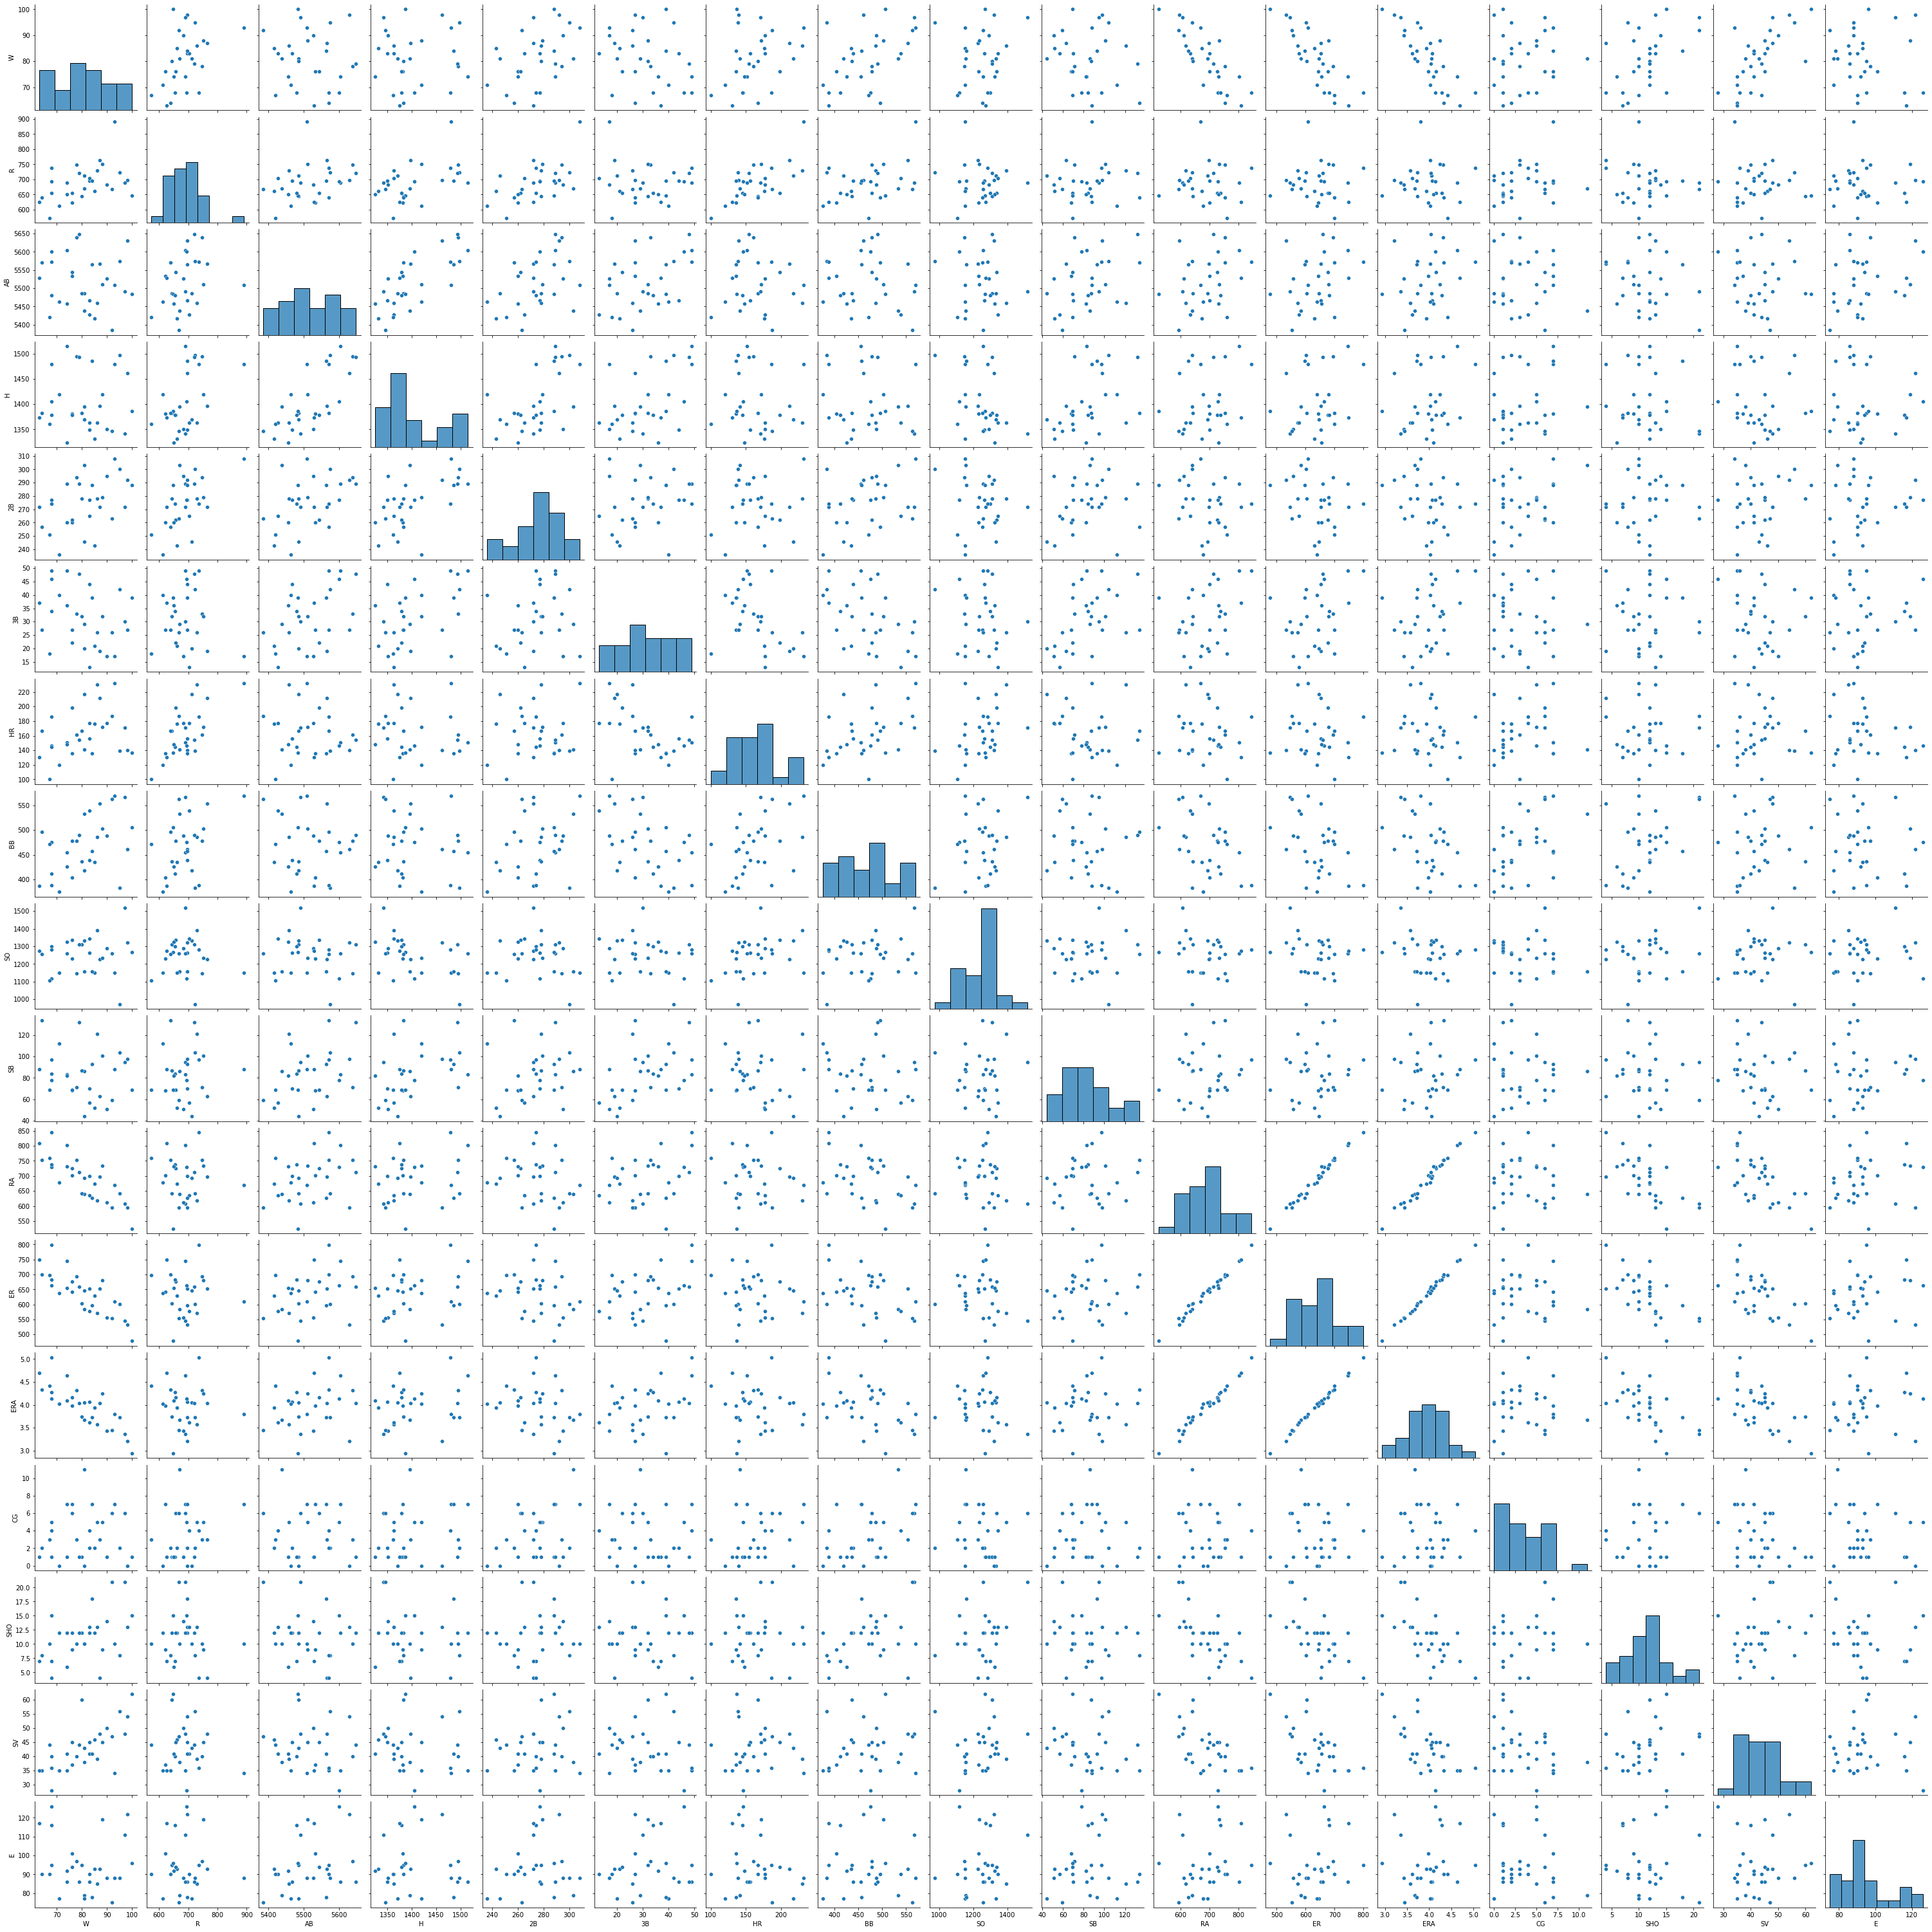

In [23]:
sns.pairplot(df) #scatterplot

Above the pair plots of each pair of features. I can observe whether they are making good correlation or if they are just scattered with out any pattern.

## Heatmap

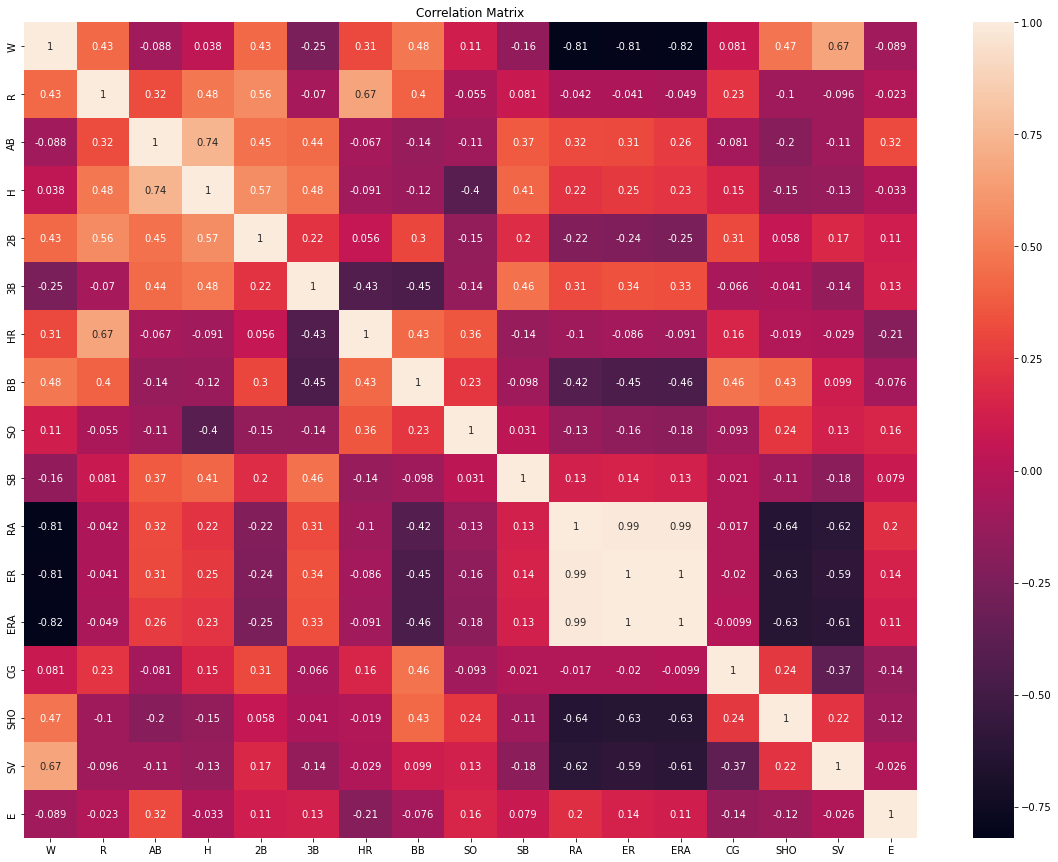

In [24]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

In this chart it is showing. it is lightly correlated with each other but RA,ER,ERA columns are highly correlated with each other. Also These columns are highly negatively correlated with Wins(W) columns that means there is high impact of these columns on wining. We are dropping two columns(er,ra) and keeping ERA from them because these have same kind of effect on wins, will not affect the prediction model.

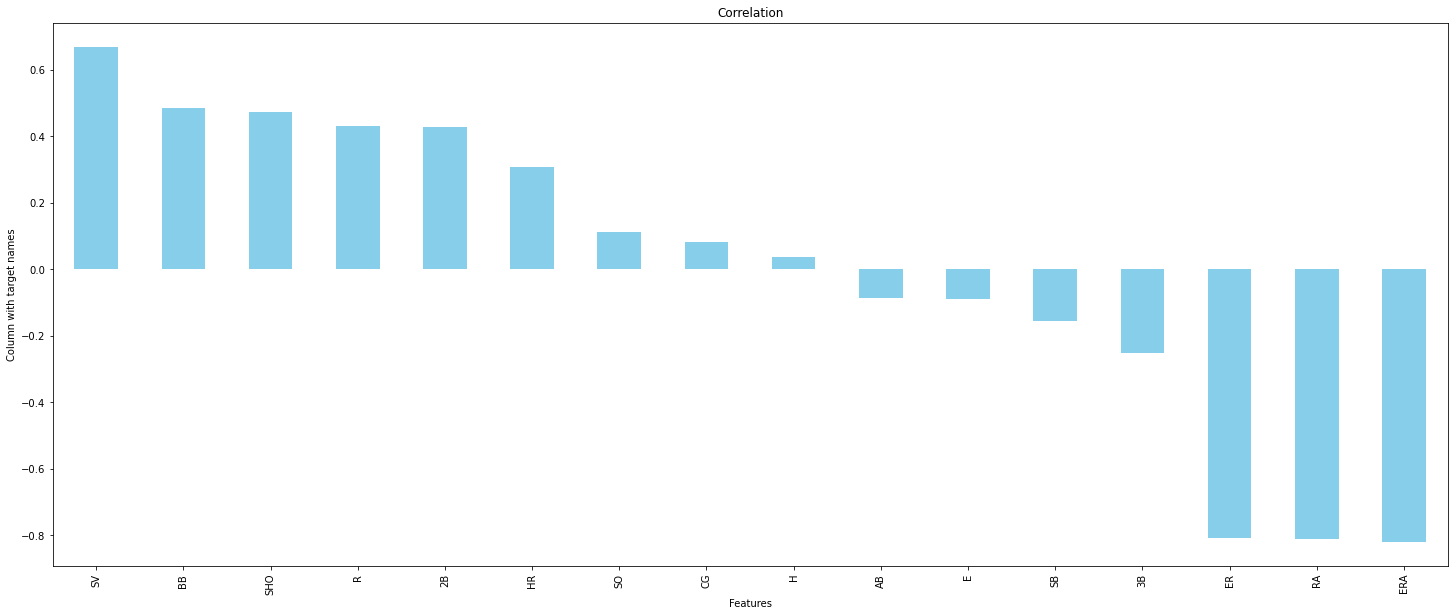

In [25]:
plt.figure(figsize =(25, 10))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

As we can see from the correlation matrix and the graph,ER,RA,ERA have the strongest correlation with wins but in negative nature.

In positive side SV has the highest correlation of 0.67 followed by BB,SHO,R,2B all above 0.4.

Even though ER,RA and ERA are very negatively correlated with wins but they showed highest correlation amongst themselves of over 0.99.

## Checking for Outliers

<AxesSubplot:>

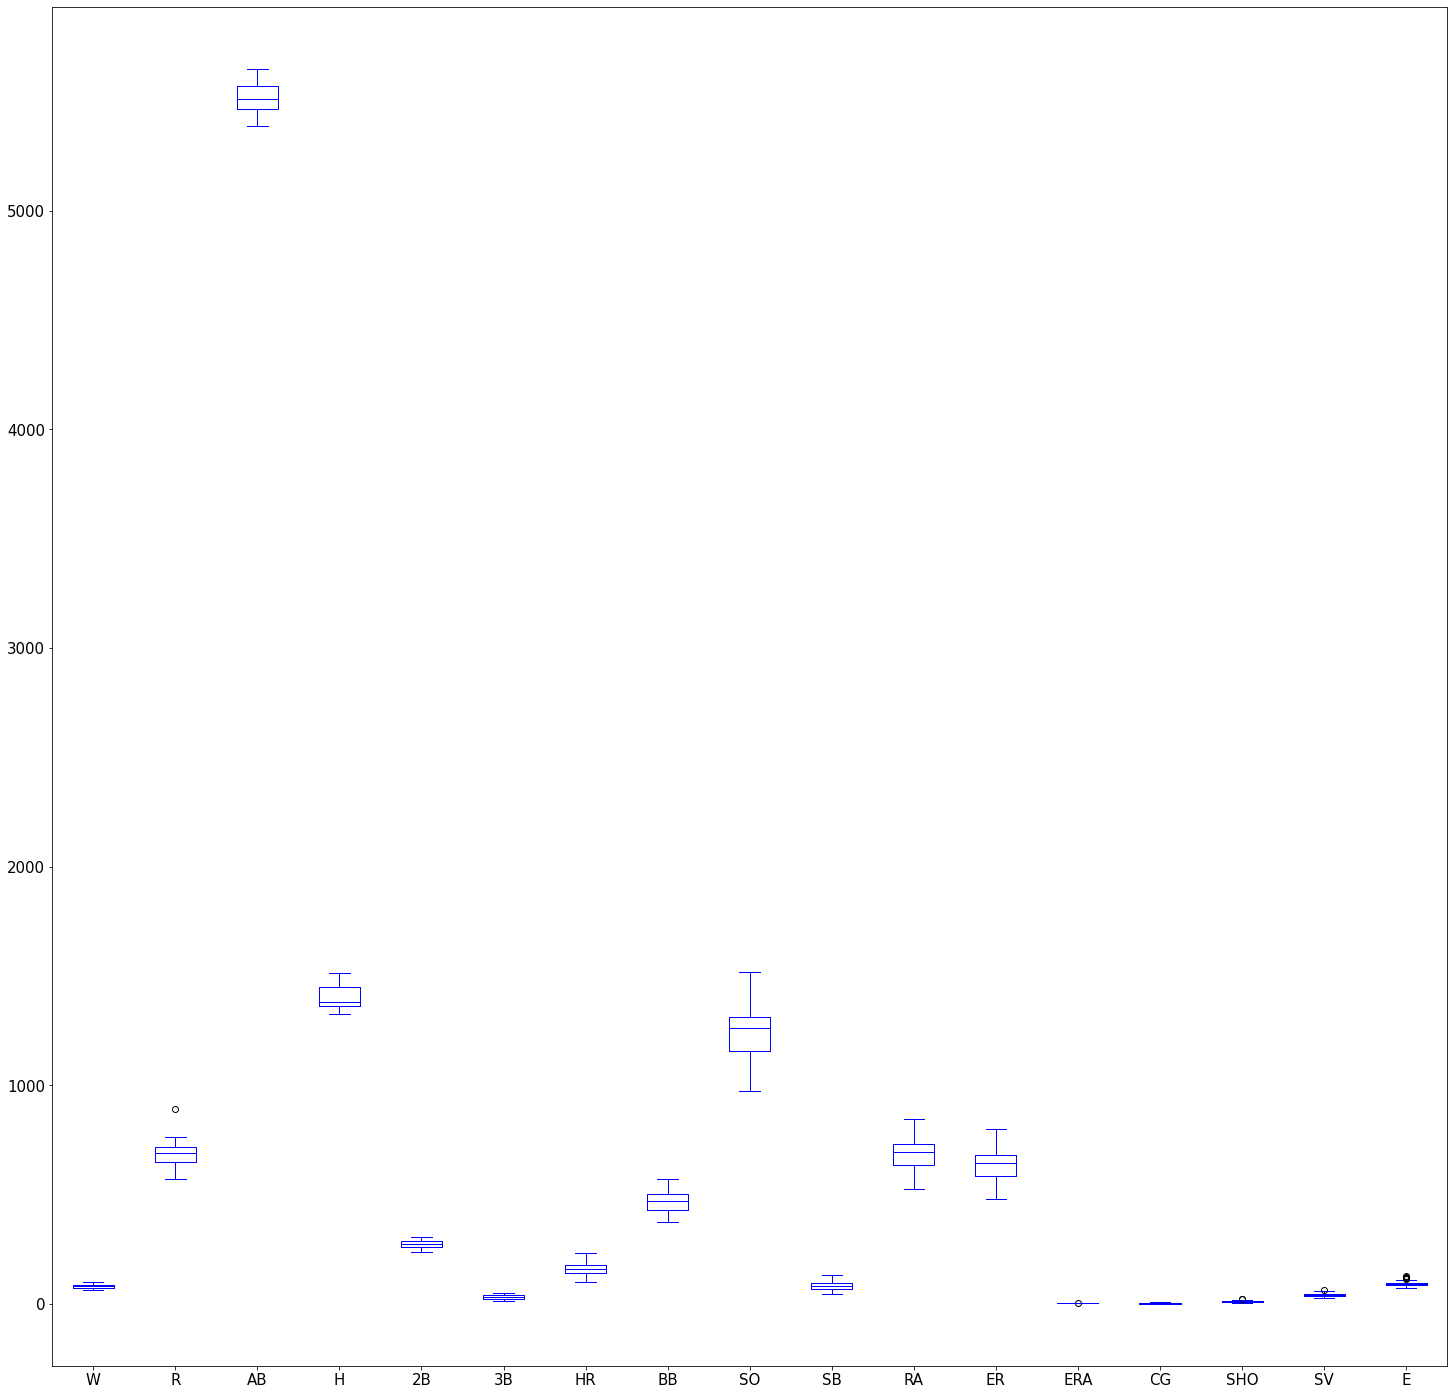

In [27]:
#checking outliers
df.plot(kind='box',fontsize=15,figsize=(25,25),color='b')

## Removing Outliers

## Zscore method 

In [28]:
#Features having outliers
features=df[['R','ERA','SHO','SV','E']]

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


I have removed outliers by using Zscore.

In [30]:
#Checking shape of new dataset
df_new.shape

(29, 17)

There are 29 rows and 17 columns of shape of new dataset after removing outliers.

In [31]:
#Checking shape of old dataset
df.shape

(30, 17)


There are 30 rows and 17 columns in old datase.

## Checking for Skewness

In [32]:
#Checking for Skewness
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

we can see that there is skewness in Hits(H),Completed games(CG),Shoutouts(SHO),Saves(SV),Errors(E).

## Removing Skewness

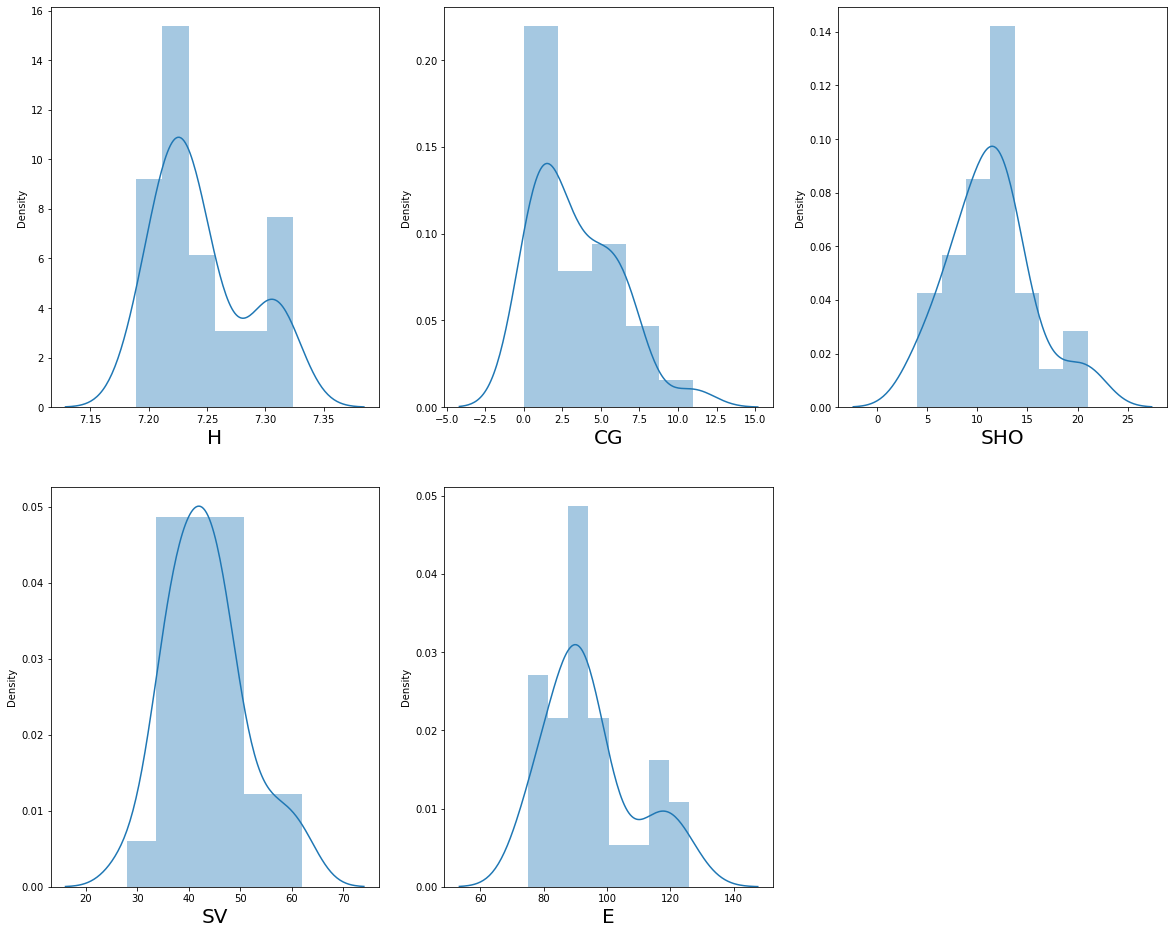

In [36]:

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[skew_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Splitting the columns

In [37]:
x = df_new.drop("W",axis=1)
y = df_new["W"]

## Scaling Data using StandardScaler

In [38]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [39]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [40]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898


## Variance inflation factor

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,7.135035,R
1,18.488544,AB
2,10.482908,H
3,3.744093,2B
4,3.279780,3B
5,8.407335,HR
6,3.404853,BB
7,2.722210,SO
8,2.106693,SB
9,198.805677,RA


VIF values i can say that multicolinearity exists in RA,ER,ERA. So let me drop RA and ER columns to avoid multicolinearity.

In [42]:
#Droping ER
X = X.drop(["ER"],axis=1)

In [43]:
X.head(10)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.150677,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.194815,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.489319,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.768604,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.614123,0.617213,-0.570122,0.211006,1.757915


I can see Dependent variables after removing multicolinearity.

In [44]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.677042,R
1,7.820003,AB
2,9.644088,H
3,3.423530,2B
4,3.269499,3B
5,7.656206,HR
6,3.403725,BB
7,2.714995,SO
8,1.905144,SB
9,147.297644,RA


Still VIF is high for 2 columns so let me drop ERA.

In [45]:
#Droping RA
X = X.drop(["ERA"],axis=1)

In [46]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.635483,R
1,4.934275,AB
2,7.954885,H
3,3.392698,2B
4,3.170085,3B
5,6.267378,HR
6,3.124379,BB
7,2.139375,SO
8,1.881755,SB
9,5.033230,RA


Multicolinearity issue is solved.

## Splitting the data for training and testing

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Let find the best random state

In [48]:
from sklearn.linear_model import  LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9813108893294152
At random state0, The test accuracy is :-0.32096661212040634


At random state1, The training accuracy is :-0.9724616751681467
At random state1, The test accuracy is :-0.5523441775760907


At random state2, The training accuracy is :-0.9652138799490677
At random state2, The test accuracy is :--0.18378012715964398


At random state3, The training accuracy is :-0.9707643281024896
At random state3, The test accuracy is :-0.5934123428672065


At random state4, The training accuracy is :-0.9636066673589542
At random state4, The test accuracy is :-0.7777892473016257


At random state5, The training accuracy is :-0.9617652055322027
At random state5, The test accuracy is :-0.5635199544207155


At random state6, The training accuracy is :-0.9759897747835666
At random state6, The test accuracy is :-0.7543443522562867


At random state7, The training accuracy is :-0.96028802949712
At random state7, The test accuracy is :-0.4056083593

We can see random state=99 giving highest accuracy,choosing that as random state.

In [49]:
#Splitting the data into 78% training and 22% testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [50]:
x_train.shape

(22, 16)

In [51]:
y_train.shape

(22,)

In [52]:
x_test.shape

(7, 16)

In [53]:
y_test.shape

(7,)

## Model Building

## Regression Algorithms

In [54]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

## 1)Linear Regression 

In [55]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9604621132932187


In [56]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 20.3574413812415
MAE: 3.8670480863935888
r2_score: 0.8813818314545541


LR is giving me 88% r2_score.

## 2)SGD

In [57]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -3.3196875336331064e+29
mae: 4.503935249712836e+31
mae: 6587198981473193.0
rmse: 6711136453472568.0


## 3)Lasso Regressor

In [58]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 10, 'random_state': 0}


In [59]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8320459199016285
mse: 22.78691274477498
mae: 4.454689502122563
rmse: 4.773563945813964


Lasso is giving me 81%r2_score.

## 4)Ridge Regressor

In [60]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [61]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8097657725705358
mse: 25.80973763165465
mae: 4.452809398272927
rmse: 5.080328496431569


Ridge is giving 80.9%r2_score.

## Cross Validation

In [62]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 35.590530, 32.374059
R   : 32.992237, 39.390743
svr   : 79.002862, 67.410236
svr_p   : 111.878461, 79.765539
svr_r   : 112.273567, 79.776501
RF   : 40.040383, 24.661820
DTR   : 71.383333, 49.410528
GBR   : 47.433958, 31.349393


According to all metrics score selecting the linearRegression as final model

## Hyper Parameter Tuning 

In [63]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [64]:
parameter = {'alpha':[0.01,0.1,1.0,10.26],
            'selection':['cyclic','random'],
            'max_iter':[2,4,6,8,10],
            'tol':[100,1000],
            'fit_intercept':['bool']}

In [65]:
GVC=GridSearchCV(Lasso(),parameter,cv=5)

In [66]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [67]:
GVC.best_params_

{'alpha': 0.1,
 'fit_intercept': 'bool',
 'max_iter': 2,
 'selection': 'random',
 'tol': 1000}

In [68]:
Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=4, selection="random", tol=1000)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_Score: 75.81500244094667
mean_squared_error: 32.81262525971153
mean_absolute_error: 4.816533098558614
RMSE value: 5.728230552248358


After tuning i got 75.81% accuracy which is good.

## Saving the model 

In [69]:
#Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']

## Predictions

In [70]:
#Loading the saved model
model=joblib.load("BaseballCaseStudy.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([69.93783046, 68.04024897, 84.85629314, 79.60000907, 85.53258375,
       87.57151782, 82.9671296 ])

In [71]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6
Predicted,69.93783,68.040249,84.856293,79.600009,85.532584,87.571518,82.96713
Original,67.00000,63.000000,97.000000,76.000000,83.000000,92.000000,86.00000


Both original and predicted values are almost equal.